<a href="https://colab.research.google.com/github/delhub/public-temp/blob/master/PyTorch_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True)
test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True)


Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [ ]:
# behaves differently from MNIST / Fashion MNIST
# it is a Numpy array!
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# we are working with color images now
train_dataset.data.shape

(50000, 32, 32, 3)

In [ ]:
# behaves differently from MNIST / Fashion MNIST
# it is a list!
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [ ]:
# number of classes
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Data loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=1, 
                                           shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.6431, 0.7529, 0.8157,  ..., 0.8314, 0.8510, 0.8667],
          [0.7569, 0.7137, 0.6941,  ..., 0.8549, 0.8627, 0.8824],
          [0.8235, 0.7294, 0.5843,  ..., 0.8902, 0.8549, 0.8941],
          ...,
          [0.3373, 0.3882, 0.4471,  ..., 0.5490, 0.6902, 0.7176],
          [0.3176, 0.3412, 0.4000,  ..., 0.6549, 0.7176, 0.7059],
          [0.3255, 0.3922, 0.4000,  ..., 0.6627, 0.6941, 0.6784]],

         [[0.6706, 0.7765, 0.8431,  ..., 0.8275, 0.8471, 0.8627],
          [0.7843, 0.7373, 0.7176,  ..., 0.8510, 0.8588, 0.8784],
          [0.8471, 0.7529, 0.6078,  ..., 0.8863, 0.8510, 0.8902],
          ...,
          [0.2784, 0.3333, 0.3922,  ..., 0.4706, 0.6039, 0.6235],
          [0.2588, 0.2824, 0.3451,  ..., 0.5725, 0.6196, 0.6039],
          [0.2667, 0.3333, 0.3412,  ..., 0.5725, 0.5922, 0.5725]],

         [[0.7098, 0.8314, 0.8902,  ..., 0.8471, 0.8667, 0.8824],
          [0.8235, 0.7922, 0.7686,  ..., 0.8706, 0.8784, 0.8980],
          [0.8824, 0.8000, 0.6588,  ..., 0

In [ ]:
# Define the model
class CNN(nn.Module):
  def __init__(self, K):
    super(CNN, self).__init__()
    
    # define the conv layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    # define the linear layers
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, K)
  
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = x.view(-1, 128 * 3 * 3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x


In [ ]:
# Instantiate the model
model = CNN(K)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)
        
      # Backward and optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

    # Get train loss and test loss
    train_loss = np.mean(train_loss) # a little misleading
    
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [ ]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 1.7158,       Test Loss: 1.6081, Duration: 0:00:07.219453
Epoch 2/15, Train Loss: 1.4214,       Test Loss: 1.3947, Duration: 0:00:07.074598
Epoch 3/15, Train Loss: 1.2967,       Test Loss: 1.2688, Duration: 0:00:06.761287
Epoch 4/15, Train Loss: 1.2124,       Test Loss: 1.2094, Duration: 0:00:06.704640
Epoch 5/15, Train Loss: 1.1418,       Test Loss: 1.1632, Duration: 0:00:06.934821
Epoch 6/15, Train Loss: 1.0851,       Test Loss: 1.1306, Duration: 0:00:06.955590
Epoch 7/15, Train Loss: 1.0349,       Test Loss: 1.1121, Duration: 0:00:06.899095
Epoch 8/15, Train Loss: 0.9968,       Test Loss: 1.0605, Duration: 0:00:06.719118
Epoch 9/15, Train Loss: 0.9572,       Test Loss: 1.0563, Duration: 0:00:06.788544
Epoch 10/15, Train Loss: 0.9220,       Test Loss: 1.0498, Duration: 0:00:06.779329
Epoch 11/15, Train Loss: 0.8913,       Test Loss: 1.0131, Duration: 0:00:06.835230
Epoch 12/15, Train Loss: 0.8553,       Test Loss: 0.9954, Duration: 0:00:06.686649
Epoch 13/15, 

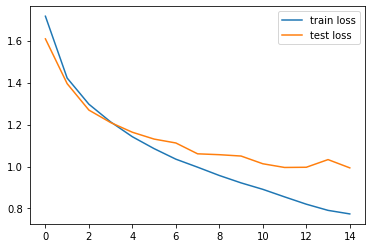

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [ ]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)
  
  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)
  
  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.7456, Test acc: 0.6610


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[738  23  44  17  11   5  13   8 112  29]
 [ 24 784   9  14   3   5   7   6  61  87]
 [ 93   8 462 102 122  61  78  36  26  12]
 [ 26  11  63 507  64 166  76  35  25  27]
 [ 33   4  73  81 603  33  66  85  18   4]
 [ 20   4  61 243  56 494  30  63  19  10]
 [ 12  11  31  77  53  33 745   8  11  19]
 [ 14   5  35  68  74  58  12 698   9  27]
 [ 74  37  12  23   9   8   3   3 806  25]
 [ 47 126  11  29   5  13  15  17  53 684]]


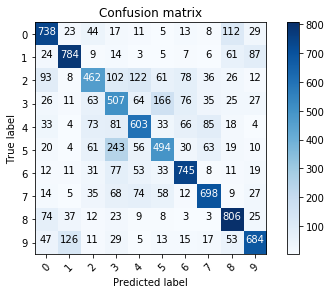

In [ ]:
# get all predictions in an array and plot confusion matrix

x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
  # Move to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  _, predictions = torch.max(outputs, 1)
  
  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

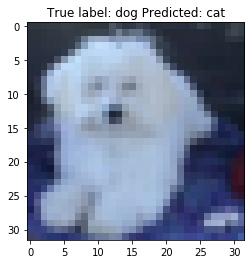

In [ ]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));